In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv('d:/data/bankloans.csv')

In [3]:
df

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0
...,...,...,...,...,...,...,...,...,...
845,34,1,12,15,32,2.7,0.239328,0.624672,NaN
846,32,2,12,11,116,5.7,4.026708,2.585292,NaN
847,48,1,13,11,38,10.8,0.722304,3.381696,NaN
848,35,2,1,11,24,7.8,0.417456,1.454544,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       850 non-null    int64  
 1   ed        850 non-null    int64  
 2   employ    850 non-null    int64  
 3   address   850 non-null    int64  
 4   income    850 non-null    int64  
 5   debtinc   850 non-null    float64
 6   creddebt  850 non-null    float64
 7   othdebt   850 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


In [6]:
df.dropna(inplace=True)

In [7]:
df

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0
...,...,...,...,...,...,...,...,...,...
695,36,2,6,15,27,4.6,0.262062,0.979938,1.0
696,29,2,6,4,21,11.5,0.369495,2.045505,0.0
697,33,1,15,3,32,7.6,0.491264,1.940736,0.0
698,45,1,19,22,77,8.4,2.302608,4.165392,0.0


In [8]:
## Feature selection


## 1. Relationship with Y

## 2. Multicollinearity


In [9]:
df.groupby('default').mean()

,age,ed,employ,address,income,debtinc,creddebt,othdebt
default,,,,,,,,
0.0,35.514507,1.659574,9.508704,8.945841,47.154739,8.679304,1.245493,2.773409
1.0,33.010929,1.901639,5.224044,6.393443,41.213115,14.727869,2.423865,3.862807


In [10]:
## plotted scatter, histograms, boxplots

In [ ]:
## employ, income, debtinc, creddebt, othdebt, address

<AxesSubplot:xlabel='default', ylabel='employ'>

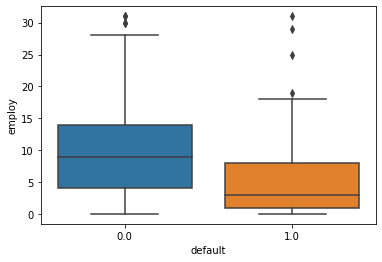

In [11]:
sns.boxplot(x=df.default, y=df.employ)

In [12]:
def plot1(x):
    print(f"{x.name} vs Default")
    sns.boxplot(x=df.default, y=x)
    plt.show()

age vs Default


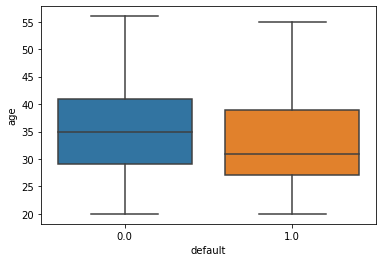

ed vs Default


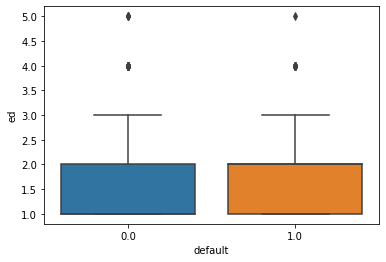

employ vs Default


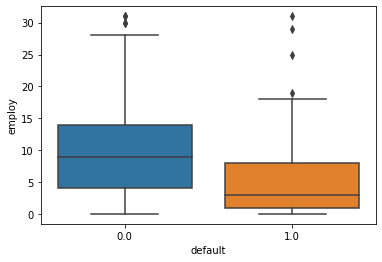

address vs Default


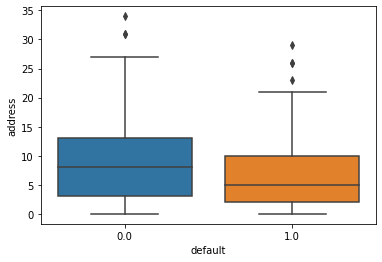

income vs Default


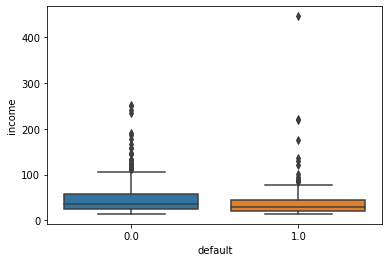

debtinc vs Default


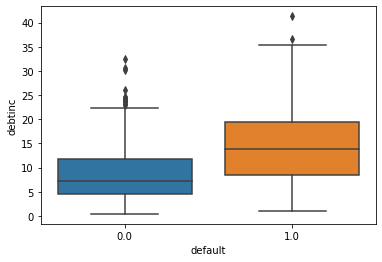

creddebt vs Default


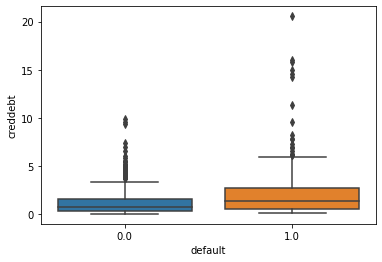

othdebt vs Default


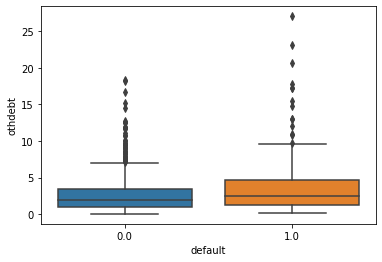

age         None
ed          None
employ      None
address     None
income      None
debtinc     None
creddebt    None
othdebt     None
dtype: object

In [15]:
df.drop(columns='default').apply(plot1)

In [16]:
features = ['employ', 'income', 'debtinc', 'creddebt', 'othdebt', 'address']

In [17]:
df[features]

,employ,income,debtinc,creddebt,othdebt,address
0,17,176,9.3,11.359392,5.008608,12
1,10,31,17.3,1.362202,4.000798,6
2,15,55,5.5,0.856075,2.168925,14
3,15,120,2.9,2.658720,0.821280,14
4,2,28,17.3,1.787436,3.056564,0
...,...,...,...,...,...,...
695,6,27,4.6,0.262062,0.979938,15
696,6,21,11.5,0.369495,2.045505,4
697,15,32,7.6,0.491264,1.940736,3
698,19,77,8.4,2.302608,4.165392,22


In [18]:
## multi-collinearity

## correlation

In [19]:
df[features].corr()

,employ,income,debtinc,creddebt,othdebt,address
employ,1.000000,0.619681,-0.031182,0.403694,0.406091,0.322334
income,0.619681,1.000000,-0.026777,0.570199,0.610659,0.316245
debtinc,-0.031182,-0.026777,1.000000,0.501767,0.584870,0.011323
creddebt,0.403694,0.570199,0.501767,1.000000,0.633104,0.208435
othdebt,0.406091,0.610659,0.584870,0.633104,1.000000,0.226514
address,0.322334,0.316245,0.011323,0.208435,0.226514,1.000000


In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [21]:
df[features]

,employ,income,debtinc,creddebt,othdebt,address
0,17,176,9.3,11.359392,5.008608,12
1,10,31,17.3,1.362202,4.000798,6
2,15,55,5.5,0.856075,2.168925,14
3,15,120,2.9,2.658720,0.821280,14
4,2,28,17.3,1.787436,3.056564,0
...,...,...,...,...,...,...
695,6,27,4.6,0.262062,0.979938,15
696,6,21,11.5,0.369495,2.045505,4
697,15,32,7.6,0.491264,1.940736,3
698,19,77,8.4,2.302608,4.165392,22


In [23]:
vif = pd.DataFrame()

vif['features'] = features
vif['vif'] = [variance_inflation_factor(df[features].values, i) for i in range(6)]

In [24]:
vif

,features,vif
0,employ,4.138670
1,income,6.349557
2,debtinc,3.649289
3,creddebt,3.085204
4,othdebt,5.225470
5,address,2.660430


In [25]:
variance_inflation_factor?

In [26]:
features

['employ', 'income', 'debtinc', 'creddebt', 'othdebt', 'address']

In [ ]:
## model1

In [27]:
features1 = ['employ', 'debtinc', 'address']

In [28]:
formula1 = 'default ~ ' + ' + '.join(features1)

In [29]:
formula1

'default ~ employ + debtinc + address'

In [30]:
## train test split

In [31]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=1)

In [32]:
model1 = smf.logit(formula1, train_data).fit()

Optimization terminated successfully.
         Current function value: 0.453366
         Iterations 6


In [33]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                  560
Model:                          Logit   Df Residuals:                      556
Method:                           MLE   Df Model:                            3
Date:                Sun, 13 Aug 2023   Pseudo R-squ.:                  0.2099
Time:                        14:55:00   Log-Likelihood:                -253.89
converged:                       True   LL-Null:                       -321.33
Covariance Type:            nonrobust   LLR p-value:                 4.780e-29
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5807      0.261     -6.059      0.000      -2.092      -1.069
employ        -0.1144      0.021     -5.496      0.000      -0.155      -0.074
debtinc        0.1474      0.018      8.371      0.000       0.113       0.182
address       -0.0411      0.018     -2.225      0.026      -0.077      -0.005
==============================================================================
"""

In [38]:
train_data['pred'] = model1.predict()

In [39]:
test_data['pred'] = model1.predict(test_data)

In [37]:
roc_auc_score(train_data.default, model1.predict())

0.8043478260869565

In [40]:
roc_auc_score(test_data.default, test_data.pred)

0.84912096562582

In [41]:
## figuring out the cutoff and making the final prediction

In [46]:
import numpy as np

In [53]:
train_data['pred_classif'] = np.where( train_data['pred'] > 0.3, 1, 0 )

In [49]:
accuracy_score(train_data.default, train_data.pred_classif)

0.7839285714285714

In [50]:
confusion_matrix(train_data.default, train_data.pred_classif)

array([[386,  28],
       [ 93,  53]], dtype=int64)

In [54]:
print(classification_report(train_data.default, train_data.pred_classif))

              precision    recall  f1-score   support

         0.0       0.87      0.76      0.81       414
         1.0       0.49      0.66      0.57       146

    accuracy                           0.73       560
   macro avg       0.68      0.71      0.69       560
weighted avg       0.77      0.73      0.74       560



In [55]:
roc_df = pd.DataFrame()
for cutoff in np.linspace(0,1,50):
    train_data['pred_classif'] = np.where(train_data.pred >cutoff,1, 0)

    TP = np.where((train_data.default == 1) & (train_data.pred_classif==1), 1,0 )
    TN = np.where((train_data.default == 0) & (train_data.pred_classif==0), 1,0 )
    FP = np.where((train_data.default == 0) & (train_data.pred_classif==1), 1,0 )
    FN = np.where((train_data.default == 1) & (train_data.pred_classif==0), 1,0 )

    actual_1 = (TP.sum()+FN.sum())
    actual_0 = (TN.sum()+FP.sum())
    
    
    ## recall of 1s
    Sensitivity = TP.sum()/actual_1
    
    
    ## recall of 0s
    Specificity = TN.sum()/actual_0
    
    Total = (TP.sum()/actual_1) + (TN.sum()/actual_0)
    temp_df = pd.DataFrame([cutoff, Sensitivity, Specificity, Total]).T
    roc_df = pd.concat([roc_df, temp_df], axis=0)
    #print('Sensitivity', TP.sum()/actual_1)
    #print('Specicity', TN.sum()/actual_0)
    #print('Total', (TP.sum()/actual_1) + (TN.sum()/actual_0))
    #print('--------------------------------------------------')

In [58]:
roc_df.columns = ['cutoff', 'Sensitivity', 'Specificity', 'Total']

In [60]:
roc_df.sort_values(by='Total', ascending=False)

,cutoff,Sensitivity,Specificity,Total
0,0.224490,0.780822,0.676329,1.457150
0,0.204082,0.808219,0.642512,1.450731
0,0.244898,0.739726,0.695652,1.435378
0,0.265306,0.712329,0.722222,1.434551
0,0.367347,0.582192,0.845411,1.427602
0,0.163265,0.876712,0.543478,1.420191
0,0.285714,0.678082,0.741546,1.419628
0,0.346939,0.595890,0.823671,1.419562
0,0.306122,0.650685,0.760870,1.411554
0,0.326531,0.616438,0.792271,1.408709


In [61]:
## 0.224490

In [62]:
%matplotlib notebook

<IPython.core.display.Javascript object>


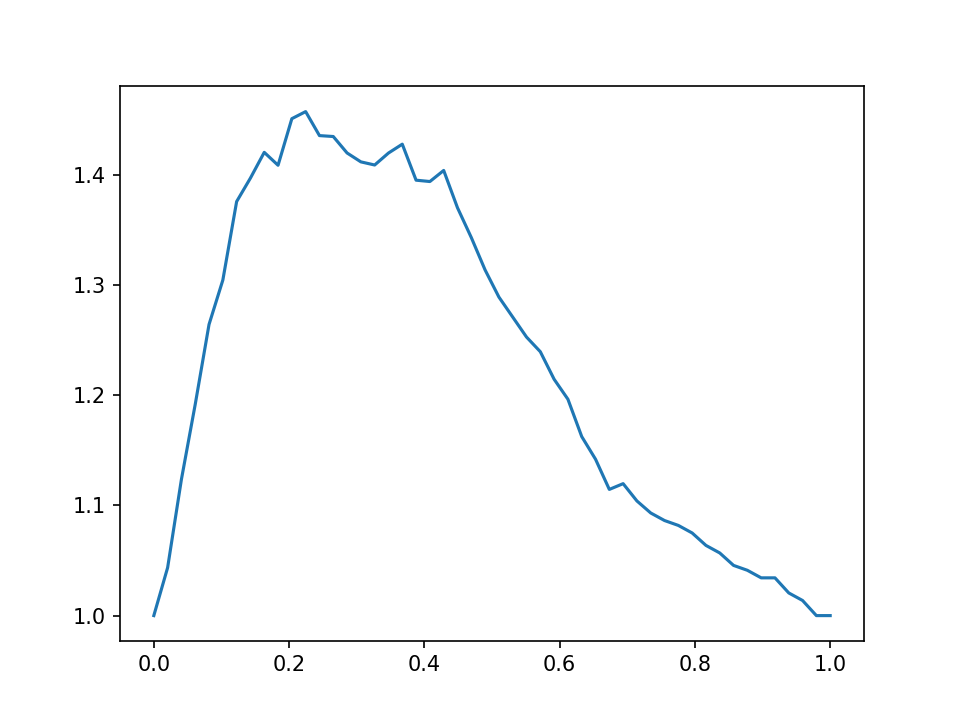

In [63]:
plt.plot(roc_df.cutoff, roc_df.Total)